# Entrega N - Título

### Grupo M:
     - D. Garat  C.I...
     - G. Moncecchi C.I...



## 1. Objetivo

El objetivo de esta tarea es construir un jugador/clasificador/... utilizando... . 

El éxito del aprendizaje se mide a través de...


## 2. Diseño

En esta sección se deben presentar las decisiones tomadas a la hora de implementar el jugador, clasificador, etc.


## 2.1 Preprocesamiento de datos
- Decisiones sobre tratamiento de datos numéricos, faltantes, etc. antes de la aplicación de el algoritmo
- Selección/generación de atributos


## 2.2 Algoritmo
Extensiones del algoritmo original necesarias para la resolución del problema: tratamiento de atributos faltantes, numéricos, etc. (si es el propio algoritmo el que lo maneja), implementaciones adicionales necesarias para manejar ensambles de clasificadores, etc.


## 2.3 Evaluación
- Qué conjunto de métricas se utilizan para la evaluación de la solución y su definición
- Sobre qué conjunto(s) se realiza el entrenamiento, ajuste de la solución, evaluación, etc. Explicar cómo se construyen estos conjuntos.

## 3. Experimentación

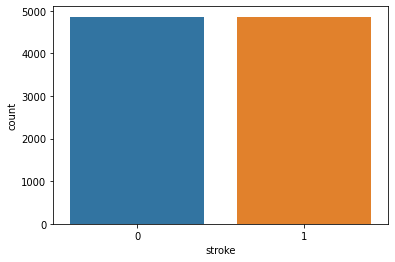

############DecisionTreeClassifier#############
F1 -> 1.0
Accuracy -> 1.0
Precision -> 1.0
Recall -> 1.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler as oversampler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall

#Carga de datos y prueba con sicklearn:

df = pd.read_csv("./healthcare-dataset-stroke-data.csv")

""""
sns.countplot(data = df, x="gender")
plt.show()
sns.countplot(data = df, x="work_type")
plt.show()
sns.countplot(data = df, x="Residence_type")
plt.show()
sns.countplot(data = df, x="smoking_status")
plt.show()
"""

media = stat.median(df['bmi'])
df['bmi'] = df['bmi'].replace(['N/A'], [media])

df['bmi'] = df['bmi'].fillna(media)
df['ever_married'] = df['ever_married'].replace(['Yes', 'No'], [1,0])
df['gender'] = df['gender'].replace(['Male', 'Female', 'Other'], [0,1,2])
df['work_type'] = df['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], [0,1,2,3,4])
df['Residence_type'] = df['Residence_type'].replace(['Urban', 'Rural'], [1,0])
df['smoking_status'] = df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [0,1,2,3])

ros = oversampler(random_state=42)
X = df[["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type",
        "avg_glucose_level", "bmi", "smoking_status"]]
Y = df.stroke
X, Y = ros.fit_resample(X,Y)

df = X
df["stroke"] = Y

sns.countplot(data = df, x="stroke")
plt.show()


#1022 test size porque es el 20%, 5110 datos en total
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1022, random_state=42)


dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, Y_train)

Y_pred = dt_clf.predict (X_test)

print("############DecisionTreeClassifier#############")
print("F1 -> "+str(f1 (Y_test, Y_pred)))
print("Accuracy -> "+str(acc (Y_test, Y_pred)))
print("Precision -> "+str(precision (Y_test, Y_pred)))
print("Recall -> "+str(recall (Y_test, Y_pred)))



In [8]:
import g02_l2_core
import numpy as np
dfGlobal = df.copy()
#del dfGlobal["id"] #el id no puede ir ya que hace sobreajuste


#1022 test size porque es el 20%, 5110 datos en total
df_train, df_test = train_test_split(dfGlobal, test_size=0.2, random_state=42)

In [9]:
#Prueba con 7 niveles
maxTreeLevels = 7
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, maxTreeLevels)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = []

for index, row in df_test.iterrows():
        eval = g02_l2_core.EvaluateTable(row, ID3_tree)
        predict.append(eval)

pred = np.array(predict, dtype=int)
print("Accuracy -> "+str(acc (df_test['stroke'].values, predict)))
print("Precision -> "+str(precision (df_test['stroke'].values, predict)))
print("Recall -> "+str(recall (df_test['stroke'].values, predict)))
print("F1 -> "+str(f1 (df_test['stroke'].values, pred)))



F1 -> 0.8127074442863917
Accuracy -> 0.7969151670951157
Precision -> 0.752414398595259
Recall -> 0.8835051546391752


In [10]:
#Prueba con 10 niveles
maxTreeLevels = 10
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, maxTreeLevels)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = []

for index, row in df_test.iterrows():
        eval = g02_l2_core.EvaluateTable(row, ID3_tree)
        predict.append(eval)

pred = np.array(predict, dtype=int)
print("Accuracy -> "+str(acc (df_test['stroke'].values, predict)))
print("Precision -> "+str(precision (df_test['stroke'].values, predict)))
print("Recall -> "+str(recall (df_test['stroke'].values, predict)))
print("F1 -> "+str(f1 (df_test['stroke'].values, pred)))

F1 -> 0.8614232209737828
Accuracy -> 0.847814910025707
Precision -> 0.7890222984562607
Recall -> 0.9484536082474226


- Presentar los distintos experimentos que se realizan y los resultados que se obtienen.

- La información de los resultados se presenta en tablas y en gráficos, de acuerdo a su naturaleza. Por ejemplo:

_En la gráfica 1, se observa el error cuadrático total del conjunto de entrenamiento a medida que pasan los juegos para el oponente X_

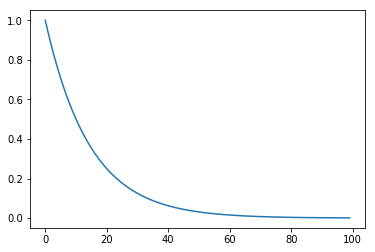

In [2]:
import matplotlib.pyplot
matplotlib.pyplot.plot(range(0,100), [2**-(x/10) for x in range(0,100)])


- Debe existir alguna instancia donde se compile la información relevante de los experimentos de forma de poder comparar fácilmente los distintos experimentos. Por ejemplo:

_En la tabla 1, se presentan los distintos resultados contra el jugador aleatorio, para los distintos valores de $\alpha$ elegidos. El mejor resultado se obtiene para $\alpha=0.05$, lo que prueba que la estrategia..._

<table>
  <tr>
    <th>$\alpha$</th>
    <th>...</th>
    <th>Turnos</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>...</td>
    <td>100</td>
    <td>0.991</td>
  </tr>    
  <tr>
    <td>0.005</td>
    <td>...</td>
    <td>100</td>
    <td>0.987</td>
  </tr>
  <tr style="font-weight:bold">
    <td>0.05</td>
    <td>...</td>
    <td>100</td>
    <td>0.329</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>...</td>
    <td>100</td>
    <td>0.564</td>
  </tr>    
    <caption>Tabla 1 - Entrenamiento del jugador X para distintos valores de $\alpha$</caption>
</table>


## 4. Conclusión

Una breve conclusión del trabajo realizado. Por ejemplo: 
- ¿cuándo se dieron los mejores resultados del jugador?
- ¿encuentra alguna relación con los parámetros / oponentes/ atributos elegidos?
- ¿cómo mejoraría los resultados?